In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom
import os, sys
import scipy.ndimage
import pickle
from multiprocessing import Pool
from skimage import measure, morphology
import random
import pylab
import skimage.transform

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow, figure, hist, plot, scatter, colorbar
get_ipython().magic('matplotlib inline')

np.random.seed(314159)
random.seed(314159)

In [2]:
DATA_PATH = 'D:\\DDSM_Clean'

In [8]:
def get_file_names(path):
    x=[]
    for root, dirs, files in os.walk(path, topdown=False):
        for name in files:
            x.append(os.path.join(root, name))
    return x

In [9]:
file_names = get_file_names(DATA_PATH)

In [10]:
df_mass = pd.read_csv(DATA_PATH + '/mass_case_description_train_set.csv')
df_calc = pd.read_csv(DATA_PATH + '/calc_case_description_train_set.csv')

In [12]:
#Convert file names to a dataframe for Mass-Training Set
df_mass["file_name"] = [ None for x in range(len(df_mass)) ]

for n in range(len(df_mass)):
    key = '\\Mass-Training_' + df_mass["patient_id"][n] +'_'+ df_mass["left or right breast"][n] +'_'+ df_mass["image view"][n]
    for fn in file_names:
        if key in fn:
            df_mass.loc[n, "file_name"] = fn
            break

In [13]:
#Convert file names to a dataframe for Calc-Training Set
df_calc["file_name"] = [ None for x in range(len(df_calc)) ]

for n in range(len(df_calc)):
    key = '\\Calc-Training_' + df_calc["patient_id"][n] +'_'+ df_calc["left or right breast"][n] +'_'+ df_calc["image view"][n]
    for fn in file_names:
        if key in fn:
            df_calc.loc[n, "file_name"] = fn
            break

In [14]:
file_names = list(df_mass["file_name"]) + list(df_calc["file_name"])
breast_density = list(df_mass["breast_density"]) + list(df_calc["breast density"])
print(len(file_names), len(breast_density))

2864 2864


D:\DDSM_Clean\Mass_Train\Mass-Training_P_01367_LEFT_MLO


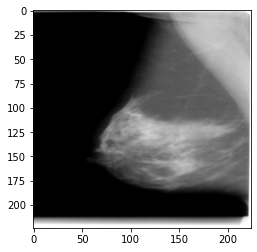

In [15]:
d = pydicom.read_file(file_names[955]) #732 gives error
print(file_names[955])
image = d.pixel_array
image_small = skimage.transform.resize(image, (224,224), preserve_range=True)
imshow(image_small, cmap='gray')
plt.show()

In [178]:
#WARNING Take Long Time: Create an image file of all images from file_names
images = []
i = 0
for fn in file_names:
    d = pydicom.read_file(fn)
    image = d.pixel_array
    image_small = skimage.transform.resize(image, (224,224), preserve_range=True) #specify image resize
    images.append(image_small)
    print(i, "out of", len(file_names))
    i +=1
len(images)

0 out of 2864
1 out of 2864
2 out of 2864
3 out of 2864
4 out of 2864
5 out of 2864
6 out of 2864
7 out of 2864
8 out of 2864
9 out of 2864
10 out of 2864
11 out of 2864
12 out of 2864
13 out of 2864
14 out of 2864
15 out of 2864
16 out of 2864
17 out of 2864
18 out of 2864
19 out of 2864
20 out of 2864
21 out of 2864
22 out of 2864
23 out of 2864
24 out of 2864
25 out of 2864
26 out of 2864
27 out of 2864
28 out of 2864
29 out of 2864
30 out of 2864
31 out of 2864
32 out of 2864
33 out of 2864
34 out of 2864
35 out of 2864
36 out of 2864
37 out of 2864
38 out of 2864
39 out of 2864
40 out of 2864
41 out of 2864
42 out of 2864
43 out of 2864
44 out of 2864
45 out of 2864
46 out of 2864
47 out of 2864
48 out of 2864
49 out of 2864
50 out of 2864
51 out of 2864
52 out of 2864
53 out of 2864
54 out of 2864
55 out of 2864
56 out of 2864
57 out of 2864
58 out of 2864
59 out of 2864
60 out of 2864
61 out of 2864
62 out of 2864
63 out of 2864
64 out of 2864
65 out of 2864
66 out of 2864
67 ou

519 out of 2864
520 out of 2864
521 out of 2864
522 out of 2864
523 out of 2864
524 out of 2864
525 out of 2864
526 out of 2864
527 out of 2864
528 out of 2864
529 out of 2864
530 out of 2864
531 out of 2864
532 out of 2864
533 out of 2864
534 out of 2864
535 out of 2864
536 out of 2864
537 out of 2864
538 out of 2864
539 out of 2864
540 out of 2864
541 out of 2864
542 out of 2864
543 out of 2864
544 out of 2864
545 out of 2864
546 out of 2864
547 out of 2864
548 out of 2864
549 out of 2864
550 out of 2864
551 out of 2864
552 out of 2864
553 out of 2864
554 out of 2864
555 out of 2864
556 out of 2864
557 out of 2864
558 out of 2864
559 out of 2864
560 out of 2864
561 out of 2864
562 out of 2864
563 out of 2864
564 out of 2864
565 out of 2864
566 out of 2864
567 out of 2864
568 out of 2864
569 out of 2864
570 out of 2864
571 out of 2864
572 out of 2864
573 out of 2864
574 out of 2864
575 out of 2864
576 out of 2864
577 out of 2864
578 out of 2864
579 out of 2864
580 out of 2864
581 out 

1030 out of 2864
1031 out of 2864
1032 out of 2864
1033 out of 2864
1034 out of 2864
1035 out of 2864
1036 out of 2864
1037 out of 2864
1038 out of 2864
1039 out of 2864
1040 out of 2864
1041 out of 2864
1042 out of 2864
1043 out of 2864
1044 out of 2864
1045 out of 2864
1046 out of 2864
1047 out of 2864
1048 out of 2864
1049 out of 2864
1050 out of 2864
1051 out of 2864
1052 out of 2864
1053 out of 2864
1054 out of 2864
1055 out of 2864
1056 out of 2864
1057 out of 2864
1058 out of 2864
1059 out of 2864
1060 out of 2864
1061 out of 2864
1062 out of 2864
1063 out of 2864
1064 out of 2864
1065 out of 2864
1066 out of 2864
1067 out of 2864
1068 out of 2864
1069 out of 2864
1070 out of 2864
1071 out of 2864
1072 out of 2864
1073 out of 2864
1074 out of 2864
1075 out of 2864
1076 out of 2864
1077 out of 2864
1078 out of 2864
1079 out of 2864
1080 out of 2864
1081 out of 2864
1082 out of 2864
1083 out of 2864
1084 out of 2864
1085 out of 2864
1086 out of 2864
1087 out of 2864
1088 out of 28

1512 out of 2864
1513 out of 2864
1514 out of 2864
1515 out of 2864
1516 out of 2864
1517 out of 2864
1518 out of 2864
1519 out of 2864
1520 out of 2864
1521 out of 2864
1522 out of 2864
1523 out of 2864
1524 out of 2864
1525 out of 2864
1526 out of 2864
1527 out of 2864
1528 out of 2864
1529 out of 2864
1530 out of 2864
1531 out of 2864
1532 out of 2864
1533 out of 2864
1534 out of 2864
1535 out of 2864
1536 out of 2864
1537 out of 2864
1538 out of 2864
1539 out of 2864
1540 out of 2864
1541 out of 2864
1542 out of 2864
1543 out of 2864
1544 out of 2864
1545 out of 2864
1546 out of 2864
1547 out of 2864
1548 out of 2864
1549 out of 2864
1550 out of 2864
1551 out of 2864
1552 out of 2864
1553 out of 2864
1554 out of 2864
1555 out of 2864
1556 out of 2864
1557 out of 2864
1558 out of 2864
1559 out of 2864
1560 out of 2864
1561 out of 2864
1562 out of 2864
1563 out of 2864
1564 out of 2864
1565 out of 2864
1566 out of 2864
1567 out of 2864
1568 out of 2864
1569 out of 2864
1570 out of 28

1994 out of 2864
1995 out of 2864
1996 out of 2864
1997 out of 2864
1998 out of 2864
1999 out of 2864
2000 out of 2864
2001 out of 2864
2002 out of 2864
2003 out of 2864
2004 out of 2864
2005 out of 2864
2006 out of 2864
2007 out of 2864
2008 out of 2864
2009 out of 2864
2010 out of 2864
2011 out of 2864
2012 out of 2864
2013 out of 2864
2014 out of 2864
2015 out of 2864
2016 out of 2864
2017 out of 2864
2018 out of 2864
2019 out of 2864
2020 out of 2864
2021 out of 2864
2022 out of 2864
2023 out of 2864
2024 out of 2864
2025 out of 2864
2026 out of 2864
2027 out of 2864
2028 out of 2864
2029 out of 2864
2030 out of 2864
2031 out of 2864
2032 out of 2864
2033 out of 2864
2034 out of 2864
2035 out of 2864
2036 out of 2864
2037 out of 2864
2038 out of 2864
2039 out of 2864
2040 out of 2864
2041 out of 2864
2042 out of 2864
2043 out of 2864
2044 out of 2864
2045 out of 2864
2046 out of 2864
2047 out of 2864
2048 out of 2864
2049 out of 2864
2050 out of 2864
2051 out of 2864
2052 out of 28

2476 out of 2864
2477 out of 2864
2478 out of 2864
2479 out of 2864
2480 out of 2864
2481 out of 2864
2482 out of 2864
2483 out of 2864
2484 out of 2864
2485 out of 2864
2486 out of 2864
2487 out of 2864
2488 out of 2864
2489 out of 2864
2490 out of 2864
2491 out of 2864
2492 out of 2864
2493 out of 2864
2494 out of 2864
2495 out of 2864
2496 out of 2864
2497 out of 2864
2498 out of 2864
2499 out of 2864
2500 out of 2864
2501 out of 2864
2502 out of 2864
2503 out of 2864
2504 out of 2864
2505 out of 2864
2506 out of 2864
2507 out of 2864
2508 out of 2864
2509 out of 2864
2510 out of 2864
2511 out of 2864
2512 out of 2864
2513 out of 2864
2514 out of 2864
2515 out of 2864
2516 out of 2864
2517 out of 2864
2518 out of 2864
2519 out of 2864
2520 out of 2864
2521 out of 2864
2522 out of 2864
2523 out of 2864
2524 out of 2864
2525 out of 2864
2526 out of 2864
2527 out of 2864
2528 out of 2864
2529 out of 2864
2530 out of 2864
2531 out of 2864
2532 out of 2864
2533 out of 2864
2534 out of 28

2864

In [183]:
np.save('images.npy', images)

In [3]:
images = np.load('images.npy')

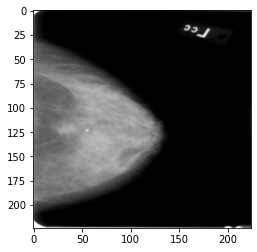

In [4]:
im = images[0] / images[0].max()
plt.imshow(im, cmap='gray')
plt.show()

In [5]:
X = np.stack(images)[...,None]
X = np.repeat(X, 3, axis=-1) #because ImageNet is RGB
X = (X - np.mean(X)) / np.std(X)

In [16]:
y = np.asarray(breast_density)-1
y = y[ :X.shape[0] ]

In [17]:
#np.save('mdata_X.npy', X)
#np.save('mdata_y.npy', y)

In [66]:
X = np.load('mdata_X.npy')
y = np.load('mdata_y.npy')

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, Xception, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, Nadam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
model_base = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [6]:
x = model_base.layers[-1].output
#x = Flatten()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, kernel_initializer='orthogonal', activation='relu')(x)
x = Dense(4, kernel_initializer='orthogonal', activation='softmax')(x)

model2 = Model(model_base.inputs, x)

In [7]:
optimizer = Adam(lr=0.0001)
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [8]:
model2.fit(
    X, 
    y, 
    batch_size=64,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
36/36 [==============================] - 1104s 31s/step - loss: 1.2707 - accuracy: 0.3763 - val_loss: 1.2586 - val_accuracy: 0.2880
Epoch 2/10
36/36 [==============================] - 1066s 30s/step - loss: 1.0770 - accuracy: 0.4998 - val_loss: 0.9040 - val_accuracy: 0.5916
Epoch 3/10
36/36 [==============================] - 1057s 29s/step - loss: 0.8368 - accuracy: 0.6281 - val_loss: 1.0153 - val_accuracy: 0.5148
Epoch 4/10
36/36 [==============================] - 1056s 29s/step - loss: 0.7532 - accuracy: 0.6770 - val_loss: 0.7278 - val_accuracy: 0.6754
Epoch 5/10
36/36 [==============================] - 1056s 29s/step - loss: 0.6850 - accuracy: 0.7128 - val_loss: 0.8359 - val_accuracy: 0.6527
Epoch 6/10
36/36 [==============================] - 1062s 30s/step - loss: 0.5926 - accuracy: 0.7486 - val_loss: 0.7711 - val_accuracy: 0.6300
Epoch 7/10
36/36 [==============================] - 1060s 29s/step - loss: 0.5095 - accuracy: 0.7927 - val_loss: 0.7970 - val_accuracy: 0.6475

In [10]:
model2.save('br_vgg_aug.h5')

In [8]:
model2 = tf.keras.models.load_model('br_vgg_aug.h5')

In [9]:
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
y_pred = model2.predict(X)

In [11]:
#Assign variables for error analysis.
#y_pred_assigned = [ np.argmax(y_pred[n]) for n in range(len(y_pred)) ]
y_pred_assigned = [ np.round(y_pred[n].dot(np.arange((4)))) for n in range(len(y_pred)) ]
y_pred_conf = [ np.max(y_pred[n]) for n in range(len(y_pred)) ]

In [12]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          do_cell_labels=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm / np.amax(cm), interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    if do_cell_labels:
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred_assigned)
cm

array([[ 416,   43,    3,    0],
       [  40, 1009,   35,    2],
       [   1,  104,  746,   25],
       [   0,    4,  104,  332]], dtype=int64)

Confusion matrix, without normalization
[[ 416   43    3    0]
 [  40 1009   35    2]
 [   1  104  746   25]
 [   0    4  104  332]]


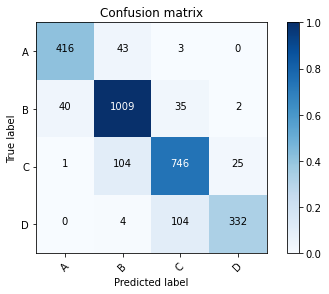

In [14]:
plot_confusion_matrix(cm, ['A', 'B', 'C', 'D'], normalize=False, do_cell_labels=True)

In [24]:
cor = 0
for i in range(len(y)):
    if y[i] == y_pred_assigned[i]:
        cor += 1
        
print("Accuracy:", cor/len(y)*100, "%")

Accuracy: 87.39525139664805 %


In [42]:
for classNum in range(4):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == classNum and y_pred_assigned[i] == classNum:
            tp += 1
        elif y[i] != classNum and y_pred_assigned[i] != classNum:
            tn += 1
        elif y[i] != classNum and y_pred_assigned[i] == classNum:
            fp += 1
        elif y[i] == classNum and y_pred_assigned[i] != classNum:
            fn += 1

    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)

    print("Selectivity of class", classNum, ":", tpr)
    print("Specificity of class", classNum, ":", tnr)
    print("")

Selectivity of class 0 : 0.9004329004329005
Specificity of class 0 : 0.9829308909242298

Selectivity of class 1 : 0.929097605893186
Specificity of class 1 : 0.9150731158605174

Selectivity of class 2 : 0.8515981735159818
Specificity of class 2 : 0.9285714285714286

Selectivity of class 3 : 0.7545454545454545
Specificity of class 3 : 0.9888613861386139

